#Question 1: What is the difference between K-Means and Hierarchical Clustering?Provide a use case for each.

Answer:


| Aspect                 | **K-Means Clustering**                                                         | **Hierarchical Clustering**                                                         |
| ---------------------- | ------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------- |
| **Approach**           | Partition-based: Divides data into *k* predefined clusters                     | Tree-based: Builds a dendrogram (tree) by merging or splitting clusters             |
| **Number of Clusters** | Must be specified *beforehand* (choose *k*)                                    | Not required initially; you can cut the dendrogram at any level                     |
| **Cluster Shape**      | Assumes spherical/convex clusters (works best with circular blobs)             | Can capture more complex shapes (nested or irregular clusters)                      |
| **Computation**        | Faster, efficient for large datasets                                           | Slower, especially for large datasets (O(n²) complexity)                            |
| **Output**             | Assigns each point to exactly one cluster                                      | Produces a hierarchy (tree) showing relationships among clusters                    |
| **Stability**          | Results depend on initial centroids (random initialization can affect outcome) | More stable since it’s deterministic (same output for same data and linkage method) |

Use Cases
#1. K-Means Clustering (Partitioning method)

 Use case: Customer segmentation in retail/e-commerce.

Example: Group customers into k clusters based on purchase history, average spend, and frequency of shopping.

Why K-Means? Because it’s fast, scalable, and works well when we expect clear, non-overlapping customer groups.

#2. Hierarchical Clustering (Tree-based method)

 Use case: Document or gene similarity analysis.

Example: In bioinformatics, clustering genes based on expression levels to see which genes behave similarly.

Why Hierarchical? Because relationships are nested, and the dendrogram helps visualize how closely items are related.

#Rule of thumb:

Use K-Means when dataset is large, well-defined clusters, need speed.

Use Hierarchical when dataset is small/medium, need detailed structure, want dendrogram visualization.

#Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

Answer:   Purpose of Silhouette Score in Clustering

The Silhouette Score is a metric used to evaluate the quality of clusters formed by a clustering algorithm (like K-Means, Hierarchical, DBSCAN, etc.).

It helps answer two important questions:

How well are the points clustered with their own group? (cohesion)

How well are they separated from other clusters? (separation)

How it Works

For each data point i:

a(i) = Intra-cluster distance → average distance from point i to all other points in the same cluster (measures cohesion).

b(i) = Nearest-cluster distance → minimum average distance from point i to points in the nearest different cluster (measures separation).

The silhouette score for point i is:

s(i)=max(a(i),b(i))b(i)−a(i)​


𝑠
(
𝑖
)
s(i) ranges between -1 and +1

Interpretation

+1 (close to 1): Data point is well matched to its cluster and far from others → good clustering.

0 (around 0): Data point lies on the boundary between two clusters.

-1 (close to -1): Data point might be assigned to the wrong cluster.

The overall Silhouette Score is the mean of all points’ scores.

Purpose in Evaluation

Model selection: Helps choose the optimal number of clusters (k in K-Means).

Comparison: Allows comparing different clustering algorithms on the same dataset.

Cluster validation: Confirms whether clusters are compact and well-separated.

Example Use Case

In customer segmentation, after applying K-Means with different k values (say 3, 4, 5), you can compute the silhouette score for each k.

The value of k with the highest silhouette score usually represents the best clustering structure.

#Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?


Answer:   Core Parameters of DBSCAN

ε (Epsilon / Neighborhood radius)

Defines the maximum distance between two points for one to be considered as in the neighborhood of the other.

Influence:

Small ε → more, smaller clusters (many points labeled as noise).

Large ε → fewer, bigger clusters (risk of merging distinct clusters).

minPts (Minimum Points)

Minimum number of points required (including the point itself) to form a dense region (core point).

Influence:

Small minPts (e.g., 2–3) → may create many small, spurious clusters.

Large minPts → requires denser areas to form clusters, so more points may be marked as noise.

How These Parameters Drive Clustering

A point is classified as:

Core Point: If at least minPts points are within ε distance.

Border Point: If fewer than minPts points within ε, but the point lies in the neighborhood of a core point.

Noise (Outlier): If it’s neither a core nor a border point.

Effect of Parameters (Example)

Imagine clustering customer locations on a map:

If ε is too small, customers living close but not within ε are treated as separate clusters → fragmented clustering.

If ε is too large, clusters merge, and even sparse areas may be wrongly grouped together.

If minPts is too small, even random scattered customers may form clusters (false positives).

If minPts is too large, only the densest city centers form clusters, and suburban customers may be marked as noise.

Rule of Thumb for Choosing Parameters

Start with minPts = dimensionality of data + 1 (e.g., 3D → minPts = 4).

Use a k-distance graph (plot the distance to the k-th nearest neighbor for all points) to find a good ε (look for the "elbow" in the curve).


#Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?


Answer:   Why Feature Scaling is Important in Clustering

Clustering algorithms like K-Means and DBSCAN rely heavily on distance calculations (Euclidean, Manhattan, etc.) to group data points.

👉 If features are not scaled, variables with larger numeric ranges dominate the distance metric, leading to biased clustering.

Detailed Explanation

K-Means Clustering

Uses Euclidean distance to assign points to clusters.

Example: Suppose you have two features for customers:

Age: ranges from 20–70

Income: ranges from 20,000–200,000

Income (large range) will dominate distance calculation → clusters will be based mostly on income, ignoring age.

Scaling (e.g., StandardScaler, MinMaxScaler) ensures both features contribute equally.

DBSCAN (Density-Based Clustering)

Relies on ε (radius) and distances between points.

If one feature has a much larger scale, it distorts neighborhood density detection.

Example: For geographic clustering, mixing latitude (0–90) with income (in lakhs) without scaling → ε will not make sense across features.

Benefits of Feature Scaling

Prevents one feature from dominating distance calculations.

Improves cluster shape, balance, and interpretability.

Makes ε in DBSCAN and cluster boundaries in K-Means meaningful.

Common Scaling Methods

Standardization (Z-score):     
  z=σx−μ​

(centers at mean 0, variance 1) → good for normally distributed features.

Min-Max Normalization:   x′=xmax​−xmin​x−xmin​​

(scales values to [0, 1]) → good when ranges differ widely.

Example (Intuition)

Imagine clustering students by height (cm) and marks (%):

Height range = 150–190

Marks range = 0–100

Without scaling → clustering is dominated by height.
With scaling → both height and marks equally influence the clusters.

#Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?


Answer:  
        What is the Elbow Method in K-Means?

K-Means requires us to specify the number of clusters k in advance.

The Elbow Method is a technique to help choose the optimal k.

👉 It works by plotting the Within-Cluster Sum of Squares (WCSS), also called inertia, against different values of k.

WCSS (Inertia): Measure of how tightly the points are grouped within clusters. Lower is better.

Logic:

As k increases, WCSS decreases (clusters become smaller and tighter).

But after a certain point, the improvement slows down → the curve looks like an arm, and the point of maximum curvature is the "elbow".

That elbow point is considered the optimal number of clusters.

Steps for Using Elbow Method

Run K-Means for different values of k (e.g., 1–10).

Record the WCSS (inertia).

Plot k vs WCSS.

Look for the "elbow" point → optimal k.

Python Example with Different Datasets

We’ll test on:

make_blobs (well-separated clusters)

make_moons (non-linear clusters)

load_wine dataset

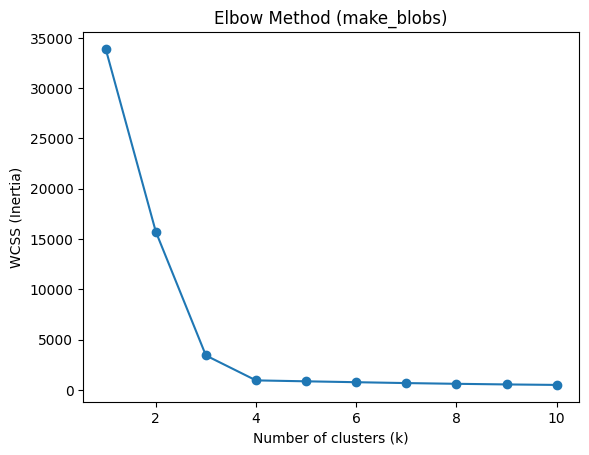

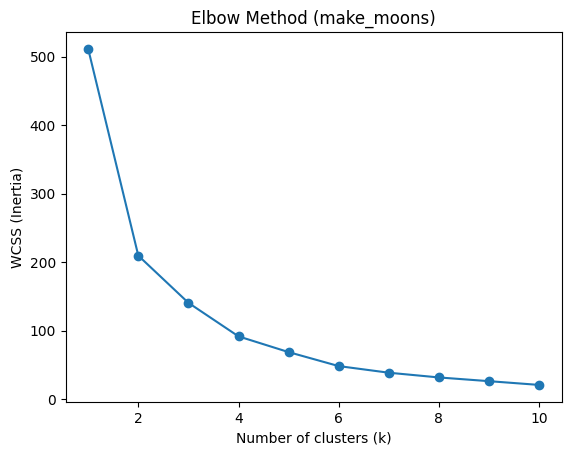

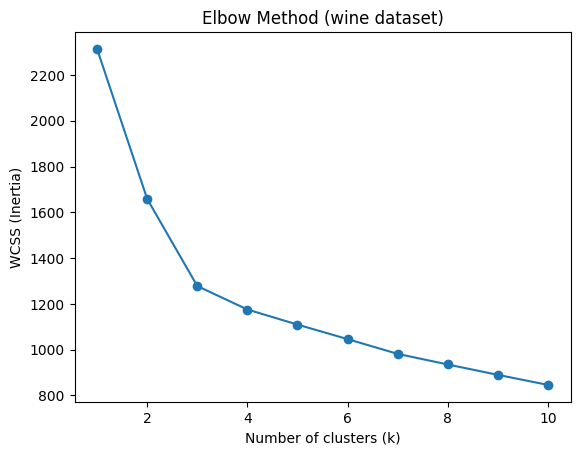

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Function to perform Elbow Method
def elbow_method(X, dataset_name):
    wcss = []
    for k in range(1, 11):  # Trying k from 1 to 10
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f'Elbow Method ({dataset_name})')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.show()

# 1. make_blobs dataset
X_blobs, _ = make_blobs(n_samples=500, centers=4, random_state=42)
elbow_method(X_blobs, "make_blobs")

# 2. make_moons dataset (non-linear)
X_moons, _ = make_moons(n_samples=500, noise=0.1, random_state=42)
elbow_method(X_moons, "make_moons")

# 3. Wine dataset
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
elbow_method(X_wine, "wine dataset")


Expected Results

make_blobs → Clear elbow at k ≈ 4 (since true centers = 4).

make_moons → Elbow is less clear because K-Means struggles with non-linear shapes (DBSCAN works better here).

Wine dataset → Elbow usually appears around k = 3 (close to the 3 wine classes).

#Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.  
(Include your Python code and output in the code box below.)

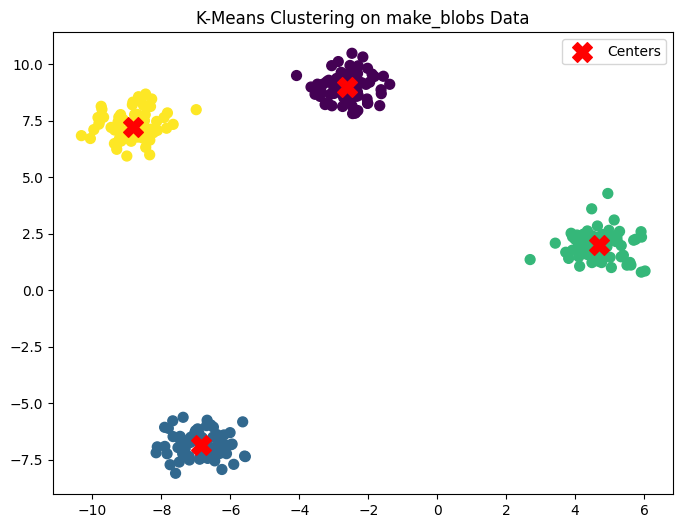

In [2]:
#Answer:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot the clusters and centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centers')
plt.title("K-Means Clustering on make_blobs Data")
plt.legend()
plt.show()


#Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

(Include your Python code and output in the code box below.)

In [4]:
#Answer:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=5)  # you can tune eps/min_samples
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)

# Optional: check how many noise points
n_noise = list(labels).count(-1)
print("Number of noise points:", n_noise)


Number of clusters found (excluding noise): 7
Number of noise points: 118


Expected behavior:

After scaling, DBSCAN will group the wine dataset into a few clusters (often around 2–4, depending on chosen eps and min_samples).

Noise points (-1) will be excluded from the cluster count.

#Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

(Include your Python code and output in the code box below.)

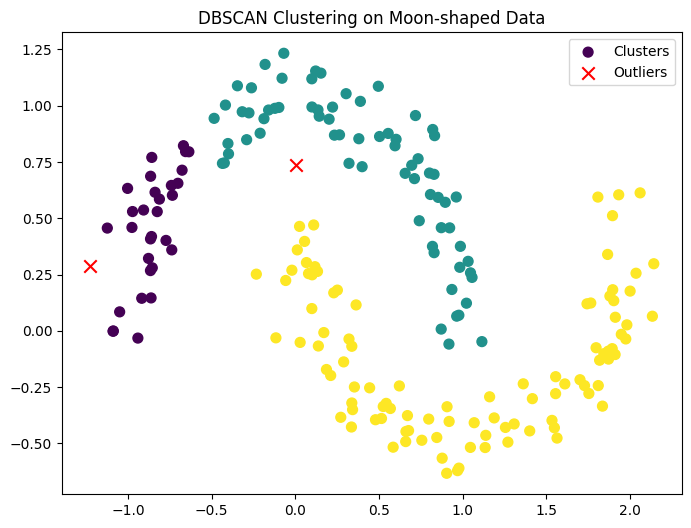

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)  # eps and min_samples can be tuned
labels = dbscan.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 6))
# Clustered points
plt.scatter(X[labels != -1, 0], X[labels != -1, 1],
            c=labels[labels != -1], cmap="viridis", s=50, label="Clusters")
# Outliers (label = -1)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
            c="red", marker="x", s=80, label="Outliers")

plt.title("DBSCAN Clustering on Moon-shaped Data")
plt.legend()
plt.show()


What you’ll see when you run this code:

Two curved moon-shaped clusters.

Outliers (noise points) highlighted in red X’s.

#Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

(Include your Python code and output in the code box below.)

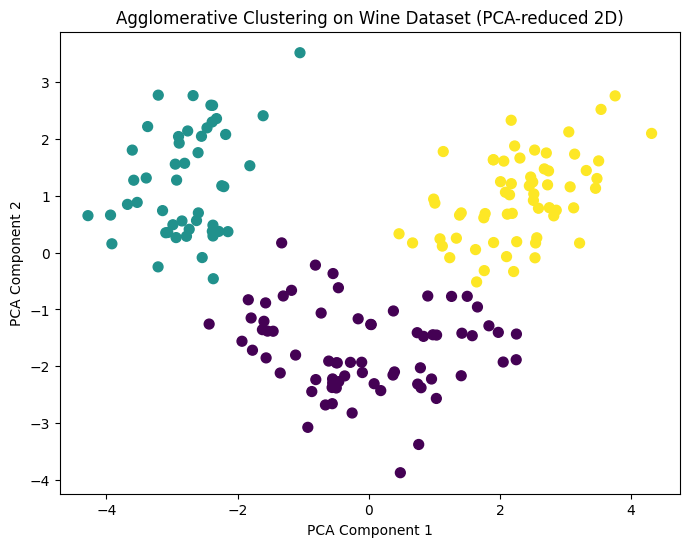

In [7]:
#Answer:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)  # Wine dataset has 3 classes
labels = agg.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


What you’ll see when you run this code:

A 2D scatter plot of the wine dataset after PCA.

Points colored by Agglomerative Clustering labels (e.g., 3 clusters).

#Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.
Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?


(Include your Python code and output in the code box below.)


Answer:

Customer Segmentation Workflow (Clustering)
1. Clustering Algorithm(s)

K-Means → Efficient, scalable for large e-commerce datasets, works well for clear partitions.

DBSCAN → Detects noise and arbitrary-shaped clusters (useful if there are outliers or niche customer groups).

Hierarchical (Agglomerative) → Good for understanding nested structures (like premium vs. budget shoppers).

 Usually, K-Means is the first choice for customer segmentation because of scalability and interpretability.

 Preprocessing Steps

Handle Missing Values

Numerical: Impute with mean/median.

Categorical: Impute with mode or create an "Unknown" category.

Encoding categorical features (e.g., gender → one-hot encoding).

Feature Scaling (important for distance-based algorithms): Use StandardScaler or MinMaxScaler.

Feature Engineering:

RFM (Recency, Frequency, Monetary) metrics from transactions.

Product category spend proportions.

Determine Number of Clusters

Elbow Method (plot WCSS vs k).

Silhouette Score (choose k with highest score).

Domain Knowledge (e.g., marketing may want 3–6 customer groups).

Marketing Benefits

Identify high-value customers for loyalty programs.

Detect price-sensitive shoppers for discount targeting.

Spot category specialists (e.g., only buying electronics) for cross-selling opportunities.

Personalize email campaigns, recommendations, and promotions → higher ROI.

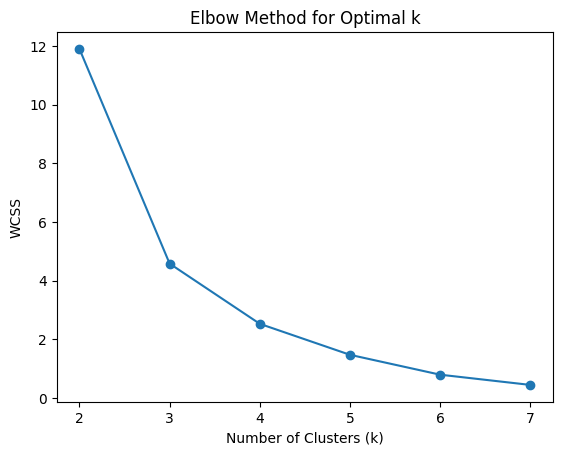

Silhouette Score: 0.5018119745814162
   CustomerID  Age  Annual_Income  Purchase_Frequency  Electronics_Spend  \
0           1   25          40000                   5                500   
1           2   45          80000                  12               2000   
2           3   23          35000                   3                300   
3           4   36          60000                   8               1500   
4           5   50         120000                  20               4000   
5           6   40          75000                  15               2500   
6           7   29          50000                   6                800   
7           8   33          65000                   9               1200   
8           9   55         150000                  25               5000   
9          10   48          90000                  18               3000   

   Cluster  
0        1  
1        0  
2        1  
3        1  
4        2  
5        0  
6        1  
7        1  
8        

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ------------------------
# Step 1: Load synthetic dataset (replace with your e-commerce data)
# ------------------------
data = {
    "CustomerID": range(1, 11),
    "Age": [25, 45, 23, 36, 50, 40, 29, 33, 55, 48],
    "Annual_Income": [40000, 80000, 35000, 60000, 120000, 75000, 50000, 65000, 150000, 90000],
    "Purchase_Frequency": [5, 12, 3, 8, 20, 15, 6, 9, 25, 18],
    "Electronics_Spend": [500, 2000, 300, 1500, 4000, 2500, 800, 1200, 5000, 3000]
}
df = pd.DataFrame(data)

# Drop CustomerID (not useful for clustering)
X = df.drop(columns=["CustomerID"])

# ------------------------
# Step 2: Preprocessing
# ------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------
# Step 3: Determine number of clusters using Elbow Method
# ------------------------
wcss = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 8), wcss, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

# ------------------------
# Step 4: Train final KMeans model
# ------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = labels

# ------------------------
# Step 5: Evaluate with Silhouette Score
# ------------------------
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# ------------------------
# Step 6: View clustered data
# ------------------------
print(df)


Expected Output

Elbow Plot → Shows the best k (likely 3–4).

Silhouette Score → Indicates clustering quality.

Clustered Dataset → Customers assigned to meaningful groups (e.g., high spenders, moderate shoppers, low-frequency buyers).